In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
sales = pd.read_csv('House+Sales.csv')

In [9]:
sales

,Datesold,Postcode,Price,Property Type,Bedrooms,Year
0,07/02/2007 00:00,2607,525000,house,4,2007
1,27/02/2007 00:00,2906,290000,house,3,2007
2,07/03/2007 00:00,2905,328000,house,3,2007
3,09/03/2007 00:00,2905,380000,house,4,2007
4,21/03/2007 00:00,2906,310000,house,3,2007
...,...,...,...,...,...,...
28190,21/12/2018 00:00,2612,580000,unit,2,2018
28191,22/12/2018 00:00,2602,750000,house,3,2018
28192,24/12/2018 00:00,2914,640000,house,4,2018
28193,24/12/2018 00:00,2602,780000,house,3,2018


In [10]:
# find the how many houses and properties are sold 
sales.count()

Datesold         28195
Postcode         28195
Price            28195
Property Type    28195
Bedrooms         28195
Year             28195
dtype: int64

In [12]:
# calculate the average house price
sales['Price'].mean()

608535.3251640361

In [13]:
# find the highest sales
sales['Price'].max()

8000000

In [14]:
sales[sales['Price'].max()==sales['Price']]

,Datesold,Postcode,Price,Property Type,Bedrooms,Year
15186,02/11/2015 00:00,2611,8000000,house,4,2015


In [16]:
# Group the dataset by years , bedrooms and prperty type
sales_y = sales.groupby('Year')
sales_b = sales.groupby('Bedrooms')
sales_t = sales.groupby('Property Type')

In [20]:
# find the cheapest house sale in 2010
house = sales_t.get_group('house')
house

,Datesold,Postcode,Price,Property Type,Bedrooms,Year
0,07/02/2007 00:00,2607,525000,house,4,2007
1,27/02/2007 00:00,2906,290000,house,3,2007
2,07/03/2007 00:00,2905,328000,house,3,2007
3,09/03/2007 00:00,2905,380000,house,4,2007
4,21/03/2007 00:00,2906,310000,house,3,2007
...,...,...,...,...,...,...
28185,21/12/2018 00:00,2602,910000,house,4,2018
28191,22/12/2018 00:00,2602,750000,house,3,2018
28192,24/12/2018 00:00,2914,640000,house,4,2018
28193,24/12/2018 00:00,2602,780000,house,3,2018


In [28]:
h_2010 = house_year.get_group(2010)

In [29]:
h_2010['Price'].min()

110000

In [24]:
# find the most expensive house sale in 2017
house_year = house.groupby('Year')

In [26]:
h_2017 = house_year.get_group(2017)

In [27]:
h_2017['Price'].max()

4700000

In [30]:
# find the most expensive house with 5 bedrooms
house_bedrooms = house.groupby('Bedrooms')

In [31]:
bed_5 = house_bedrooms.get_group(5)

In [33]:
bed_5[bed_5['Price'].max()==bed_5['Price']]

,Datesold,Postcode,Price,Property Type,Bedrooms,Year
2589,22/04/2010 00:00,2603,7300000,house,5,2010


In [ ]:
# find the cheapest unit

In [34]:
unit = sales_t.get_group('unit')

In [36]:
unit[unit['Price'].max()==unit['Price']]

,Datesold,Postcode,Price,Property Type,Bedrooms,Year
17498,03/06/2016 00:00,2607,2500000,unit,2,2016


In [40]:
# find the cheapest unit in 2008
filter_unit = sales.groupby('Year').get_group(2008)['Price'].min()

In [41]:
filter_unit


90000

In [43]:
sales.groupby('Property Type').get_group('unit')[filter_unit==sales['Price']]

C:\Users\tacti\AppData\Local\Temp/ipykernel_24736/2777455406.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales.groupby('Property Type').get_group('unit')[filter_unit==sales['Price']]


,Datesold,Postcode,Price,Property Type,Bedrooms,Year
493,21/10/2008 00:00,2612,90000,unit,0,2008


In [44]:
# find the average house price in 2015
sales.groupby('Property Type').get_group('house').groupby('Year').get_group(2015)['Price'].mean()

661248.3653410928

In [45]:
# find the total amount of unit sales in 2016
sales.groupby('Property Type').get_group('house').groupby('Year').get_group(2016)['Price'].sum()

2185322379

In [49]:
# Find the cheapest house sales at 2617
filter_post = sales.groupby('Postcode').get_group(2617).groupby('Property Type').get_group('house')['Price'].min()

In [50]:
filter_post

240000

In [51]:
house_group = sales.groupby('Property Type').get_group('house')

In [53]:
house_group[filter_post == sales['Price']]

C:\Users\tacti\AppData\Local\Temp/ipykernel_24736/3169132505.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  house_group[filter_post == sales['Price']]


,Datesold,Postcode,Price,Property Type,Bedrooms,Year
18279,30/08/2016 00:00,2617,240000,house,1,2016
23936,30/11/2017 00:00,2605,240000,house,1,2017


In [ ]:
# visualitation 

In [54]:
Labels = ['Zero','One','Two','Three','Four','Five']

In [55]:
Bedroom = sales.groupby('Property Type').get_group('house').groupby('Bedrooms')

In [57]:
Counts = len(Bedroom.get_group(0)),len(Bedroom.get_group(1)),len(Bedroom.get_group(2)),len(Bedroom.get_group(3)),len(Bedroom.get_group(4)),len(Bedroom.get_group(5))

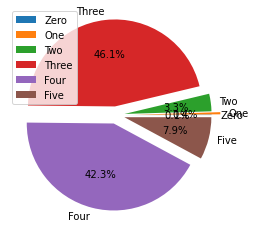

In [70]:

fig1, ax1 = plt.subplots()
ax1.pie(Counts, labels=Labels, autopct='%1.1f%%', explode = [0.1,0.2,0.1,0.1,0.1,0.1])
ax1.legend()
plt.show()

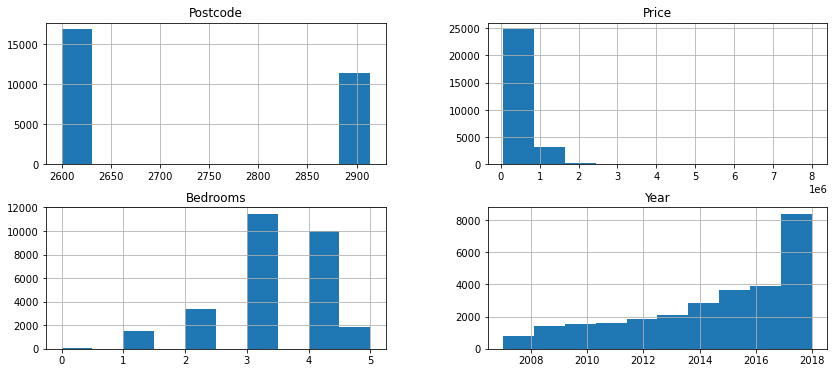

In [61]:
histogram = sales.hist(figsize=(14,6))